## Automatic differentiation

First, let's import Python packages: 

In [1]:
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

Second, add Julia's:

In [2]:
from juliacall import Main as jl
from juliacall import Pkg

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Let's try a [ForwardDiff.jl](https://github.com/JuliaDiff/ForwardDiff.jl) - Forward Mode Automatic Differentiation for Julia.

ForwardDiff implements methods to take <b>derivatives</b>, <b>gradients</b>, <b>Jacobians</b>, <b>Hessians</b>, and higher-order derivatives of native Julia functions (or any callable object, really) using <b>forward mode automatic differentiation (AD)</b>.

While performance can vary depending on the functions you evaluate, the algorithms implemented by ForwardDiff generally outperform non-AD algorithms (such as finite-differencing) in both speed and accuracy.

In [3]:
Pkg.add('ForwardDiff')

   Resolving package versions...
  No Changes to `~/anaconda3/julia_env/Project.toml`
  No Changes to `~/anaconda3/julia_env/Manifest.toml`


In [4]:
jl.seval("using ForwardDiff")

In [5]:
jl.seval('g(x) = x * exp(-x) / (x^2 + 1) * sin(pi * x)')

g (generic function with 1 method)

In [6]:
jl.seval('g1(x) = ForwardDiff.derivative(g, x)')

g1 (generic function with 1 method)

In [7]:
jl.seval('g2(x) = ForwardDiff.derivative(g1, x)')

g2 (generic function with 1 method)

In [8]:
jl.seval('g3(x) = ForwardDiff.derivative(g2, x)')

g3 (generic function with 1 method)

In [9]:
def taylor(x, a):
    return jl.g(a) + \
    jl.g1(a) * (x - a) + \
    jl.g2(a) * (x - a)**2 / 2 + \
    jl.g3(a) * (x - a)**3 / 6

In [10]:
domain = np.arange(-2, 2, step=0.05)
image = jl.map(jl.g, domain)
a = -0.4

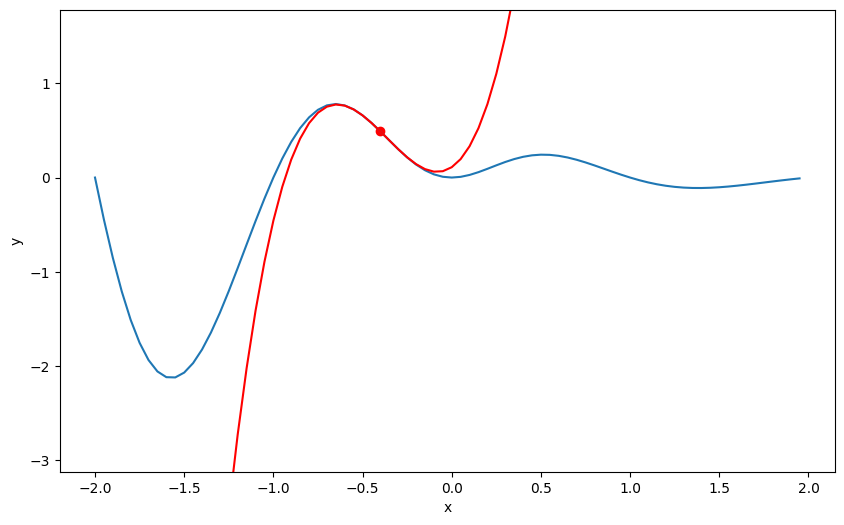

In [11]:
plt.figure(figsize=(10,6))
plt.plot(domain, image, label='f(x)')
plt.scatter([a], [jl.g(a)], color='red', label='a')
plt.plot(domain, taylor(domain, a), color='red', label='3rd order Taylor poly around a')
plt.ylim(ak.min(image) - 1, ak.max(image) + 1)
plt.ylabel('y')
plt.xlabel('x');

In [12]:
jl.seval('x -> x^2 - 5x + 6')

#5 (generic function with 1 method)

In [20]:
f = jl.eval('x -> x^2 - 5x + 6')

In [26]:
f

'x -> x^2 - 5x + 6'

In [27]:
jl.ForwardDiff.derivative(f, 2.5)

JuliaError: MethodError: objects of type String are not callable
Stacktrace:
 [1] derivative(f::String, x::Float64)
   @ ForwardDiff ~/.julia/packages/ForwardDiff/PcZ48/src/derivative.jl:14
 [2] pyjlany_call(self::typeof(ForwardDiff.derivative), args_::Py, kwargs_::Py)
   @ PythonCall.JlWrap ~/.julia/packages/PythonCall/S5MOg/src/JlWrap/any.jl:39
 [3] _pyjl_callmethod(f::Any, self_::Ptr{PythonCall.C.PyObject}, args_::Ptr{PythonCall.C.PyObject}, nargs::Int64)
   @ PythonCall.JlWrap ~/.julia/packages/PythonCall/S5MOg/src/JlWrap/base.jl:72
 [4] _pyjl_callmethod(o::Ptr{PythonCall.C.PyObject}, args::Ptr{PythonCall.C.PyObject})
   @ PythonCall.JlWrap.Cjl ~/.julia/packages/PythonCall/S5MOg/src/JlWrap/C.jl:63

In [24]:
y

'ForwardDiff.derivative(f, 2.5)'

## Linear Algebra

In [33]:
A = jl.seval('A = rand(1000, 1000)')

In [34]:
b = jl.seval('b = A * ones(1000)')

In [35]:
%timeit jl.seval('x = A \ b')

9.69 ms ± 682 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
%timeit np.linalg.solve(jl.A, jl.b)

6.66 ms ± 71.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
